Weighted Pre-Treatment Speed: 15.16 mph
Weighted Post-Treatment Speed: 14.95 mph
T-Statistic: 9.158, P-Value: 0.000


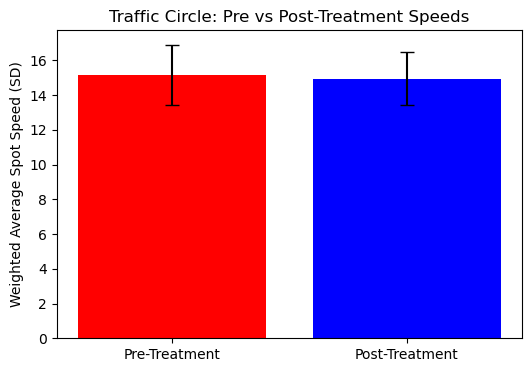

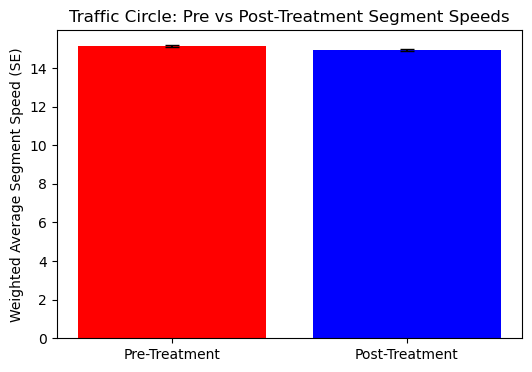

Highest value for pre-treatment'85th Speed Percentile': 28.0 mph Highest value for post-treatment'85th Speed Percentile': 28.0 mph
Row details:
Data Periods                                             Jan 01, 2021 - Nov 30, 2021
Mode of Travel                                All Vehicles - StL All Vehicles Volume
Zone ID                                                                          NaN
Zone Name                                             Clinton Street / 521594967 / 1
Line Zone Length (Miles)                                                       0.059
Zone Is Pass-Through                                                             yes
Zone Direction (degrees)                                                         270
Zone is Bi-Direction                                                             yes
Year-Month                                                                   2021-08
Day Type                                                             1: Monday (M-M)
Day Pa

,Data Periods,Mode of Travel,Zone ID,Zone Name,Line Zone Length (Miles),Zone Is Pass-Through,Zone Direction (degrees),Zone is Bi-Direction,Year-Month,Day Type,...,Avg Segment Speed (mph),Avg Segment Travel Time (sec),Free Flow Speed (mph),Free Flow Factor,Vehicle Miles of Travel (StL Volume),Vehicle Hours of Delay (StL Volume),5th Speed Percentile,75th Speed Percentile,85th Speed Percentile,95th Speed Percentile
838,"Jan 01, 2021 - Nov 30, 2021",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 13406503 / 8,0.059,yes,269,yes,2021-05,4: Thursday (Th-Th),...,16.0,13.0,17.825,0.902,3.58,0.02,7.0,18.0,20.0,59.0
1376,"Jan 01, 2021 - Nov 30, 2021",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 13406503 / 7,0.057,yes,270,yes,2021-08,6: Saturday (Sa-Sa),...,15.0,13.0,31.040,0.494,1.66,0.05,2.0,17.0,20.0,53.0
1394,"Jan 01, 2021 - Nov 30, 2021",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 13406503 / 8,0.059,yes,269,yes,2021-08,1: Monday (M-M),...,17.0,13.0,18.237,0.907,1.22,0.01,7.0,14.0,17.0,45.0
1442,"Jan 01, 2021 - Nov 30, 2021",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 521594967 / 1,0.059,yes,270,yes,2021-08,1: Monday (M-M),...,18.0,12.0,20.929,0.841,1.29,0.01,10.0,21.0,28.0,45.0
262,"Jan 01, 2021 - Nov 30, 2021",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 13406503 / 8,0.059,yes,269,yes,2021-02,4: Thursday (Th-Th),...,16.0,13.0,31.442,0.513,6.34,0.19,8.0,19.0,20.0,41.0
1185,"Jan 01, 2021 - Nov 30, 2021",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 13406503 / 7,0.057,yes,270,yes,2021-07,6: Saturday (Sa-Sa),...,17.0,12.0,21.002,0.808,2.64,0.03,4.0,20.0,22.0,38.0
1472,"Jan 01, 2021 - Nov 30, 2021",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 521594967 / 1,0.059,yes,270,yes,2021-08,6: Saturday (Sa-Sa),...,19.0,11.0,20.929,0.931,1.97,0.01,8.0,22.0,22.0,37.0
1424,"Jan 01, 2021 - Nov 30, 2021",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 13406503 / 8,0.059,yes,269,yes,2021-08,6: Saturday (Sa-Sa),...,19.0,11.0,18.237,1.000,1.93,0.00,13.0,22.0,25.0,37.0
712,"Jan 01, 2021 - Nov 30, 2021",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 521594967 / 1,0.059,yes,270,yes,2021-04,7: Sunday (Su-Su),...,17.0,12.0,23.699,0.724,2.17,0.03,8.0,20.0,21.0,34.0
1857,"Jan 01, 2021 - Nov 30, 2021",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 521594967 / 1,0.059,yes,270,yes,2021-10,6: Saturday (Sa-Sa),...,18.0,12.0,21.791,0.824,3.96,0.04,11.0,20.0,23.0,34.0


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

pre_treatment = pd.read_csv('data/Clinton_segment_pre.csv')
post_treatment = pd.read_csv('data/Clinton_segment_post.csv')

pre_filters = (pre_treatment['Day Type'] == '0: All Days (M-Su)') | (pre_treatment['Day Part'] == '0: All Day (12am-12am)')
post_filters = (post_treatment['Day Type'] == '0: All Days (M-Su)') | (post_treatment['Day Part'] == '0: All Day (12am-12am)')

pre_treatment = pre_treatment[~pre_filters]
post_treatment = post_treatment[~post_filters]

#def filter_outliers(df, column, threshold=5):
    #valid_values = df[column].dropna()
    #z_scores = stats.zscore(valid_values)
    #valid_indices = valid_values.index[np.abs(z_scores) < threshold]
    #return df.loc[valid_indices]

#pre_treatment_filtered = filter_outliers(pre_treatment, '95th Speed Percentile')
#post_treatment_filtered = filter_outliers(post_treatment, '95th Speed Percentile')

#print("Pre-treatment data size before filtering:", pre_treatment.shape)
#print("Pre-treatment data size after filtering:", pre_treatment_filtered.shape)
#print("Post-treatment data size before filtering:", post_treatment.shape)
#print("Post-treatment data size after filtering:", post_treatment_filtered.shape)

pre_speeds = pre_treatment['Avg Segment Speed (mph)']
post_speeds = post_treatment['Avg Segment Speed (mph)']
pre_volume = pre_treatment['Average Daily Segment Traffic (StL Volume)']
post_volume = post_treatment['Average Daily Segment Traffic (StL Volume)']

pre_weighted_speed = (pre_speeds * pre_volume).sum() / pre_volume.sum()
post_weighted_speed = (post_speeds * post_volume).sum() / post_volume.sum()

def weighted_std(values, weights):
    mean = (values * weights).sum() / weights.sum()
    variance = (weights * (values - mean) ** 2).sum() / weights.sum()
    return variance ** 0.5

pre_weighted_std = weighted_std(pre_speeds, pre_volume)
post_weighted_std = weighted_std(post_speeds, post_volume)
pre_weighted_se = weighted_std(pre_speeds, pre_volume) / (len(pre_speeds) ** 0.5)
post_weighted_se = weighted_std(post_speeds, post_volume) / (len(post_speeds) ** 0.5)

valid_indices = pre_speeds.notna() & post_speeds.notna()
t_stat, p_value = stats.ttest_rel(pre_speeds[valid_indices], post_speeds[valid_indices])

print(f"Weighted Pre-Treatment Speed: {pre_weighted_speed:.2f} mph")
print(f"Weighted Post-Treatment Speed: {post_weighted_speed:.2f} mph")
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

bar_colors = ['red', 'blue']
plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_std, post_weighted_std], capsize=5, color=bar_colors)
plt.ylabel('Weighted Average Spot Speed (SD)')
plt.title('Traffic Circle: Pre vs Post-Treatment Speeds')
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_se, post_weighted_se], capsize=5, color=bar_colors)

plt.ylabel('Weighted Average Segment Speed (SE)')
plt.title('Traffic Circle: Pre vs Post-Treatment Segment Speeds')
plt.show()

max_85th_speed_row_pre = pre_treatment.loc[pre_treatment['85th Speed Percentile'].idxmax()]
max_85th_speed_row_post = post_treatment.loc[post_treatment['85th Speed Percentile'].idxmax()]

max_85th_speed_value_pre = max_85th_speed_row_pre['85th Speed Percentile']
max_85th_speed_value_post = max_85th_speed_row_post['85th Speed Percentile']

print(f"Highest value for pre-treatment'85th Speed Percentile': {max_85th_speed_value_pre} mph",
     f"Highest value for post-treatment'85th Speed Percentile': {max_85th_speed_value_post} mph")
print("Row details:")
print(max_85th_speed_row_pre,max_85th_speed_row_post )
top_speed = pre_treatment.sort_values('95th Speed Percentile', ascending = False).head(10)
top_speed



In [2]:
max_95th_speed_row_pre = pre_treatment.loc[pre_treatment['95th Speed Percentile'].idxmax()]
max_95th_speed_row_post = post_treatment.loc[post_treatment['95th Speed Percentile'].idxmax()]

max_95th_speed_value_pre = max_95th_speed_row_pre['95th Speed Percentile']
max_95th_speed_value_post = max_95th_speed_row_post['95th Speed Percentile']

print(f"Highest value for pre-treatment'95th Speed Percentile': {max_95th_speed_value_pre} mph",
     f"Highest value for post-treatment'95th Speed Percentile': {max_95th_speed_value_post} mph")
print(max_95th_speed_row_pre,max_95th_speed_row_post )
top_speed = pre_treatment.sort_values('95th Speed Percentile', ascending = False).head(10)
top_speed

Highest value for pre-treatment'95th Speed Percentile': 59.0 mph Highest value for post-treatment'95th Speed Percentile': 75.0 mph
Data Periods                                             Jan 01, 2021 - Nov 30, 2021
Mode of Travel                                All Vehicles - StL All Vehicles Volume
Zone ID                                                                          NaN
Zone Name                                              Clinton Street / 13406503 / 8
Line Zone Length (Miles)                                                       0.059
Zone Is Pass-Through                                                             yes
Zone Direction (degrees)                                                         269
Zone is Bi-Direction                                                             yes
Year-Month                                                                   2021-05
Day Type                                                         4: Thursday (Th-Th)
Day Part           

,Data Periods,Mode of Travel,Zone ID,Zone Name,Line Zone Length (Miles),Zone Is Pass-Through,Zone Direction (degrees),Zone is Bi-Direction,Year-Month,Day Type,...,Avg Segment Speed (mph),Avg Segment Travel Time (sec),Free Flow Speed (mph),Free Flow Factor,Vehicle Miles of Travel (StL Volume),Vehicle Hours of Delay (StL Volume),5th Speed Percentile,75th Speed Percentile,85th Speed Percentile,95th Speed Percentile
838,"Jan 01, 2021 - Nov 30, 2021",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 13406503 / 8,0.059,yes,269,yes,2021-05,4: Thursday (Th-Th),...,16.0,13.0,17.825,0.902,3.58,0.02,7.0,18.0,20.0,59.0
1376,"Jan 01, 2021 - Nov 30, 2021",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 13406503 / 7,0.057,yes,270,yes,2021-08,6: Saturday (Sa-Sa),...,15.0,13.0,31.040,0.494,1.66,0.05,2.0,17.0,20.0,53.0
1394,"Jan 01, 2021 - Nov 30, 2021",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 13406503 / 8,0.059,yes,269,yes,2021-08,1: Monday (M-M),...,17.0,13.0,18.237,0.907,1.22,0.01,7.0,14.0,17.0,45.0
1442,"Jan 01, 2021 - Nov 30, 2021",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 521594967 / 1,0.059,yes,270,yes,2021-08,1: Monday (M-M),...,18.0,12.0,20.929,0.841,1.29,0.01,10.0,21.0,28.0,45.0
262,"Jan 01, 2021 - Nov 30, 2021",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 13406503 / 8,0.059,yes,269,yes,2021-02,4: Thursday (Th-Th),...,16.0,13.0,31.442,0.513,6.34,0.19,8.0,19.0,20.0,41.0
1185,"Jan 01, 2021 - Nov 30, 2021",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 13406503 / 7,0.057,yes,270,yes,2021-07,6: Saturday (Sa-Sa),...,17.0,12.0,21.002,0.808,2.64,0.03,4.0,20.0,22.0,38.0
1472,"Jan 01, 2021 - Nov 30, 2021",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 521594967 / 1,0.059,yes,270,yes,2021-08,6: Saturday (Sa-Sa),...,19.0,11.0,20.929,0.931,1.97,0.01,8.0,22.0,22.0,37.0
1424,"Jan 01, 2021 - Nov 30, 2021",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 13406503 / 8,0.059,yes,269,yes,2021-08,6: Saturday (Sa-Sa),...,19.0,11.0,18.237,1.000,1.93,0.00,13.0,22.0,25.0,37.0
712,"Jan 01, 2021 - Nov 30, 2021",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 521594967 / 1,0.059,yes,270,yes,2021-04,7: Sunday (Su-Su),...,17.0,12.0,23.699,0.724,2.17,0.03,8.0,20.0,21.0,34.0
1857,"Jan 01, 2021 - Nov 30, 2021",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 521594967 / 1,0.059,yes,270,yes,2021-10,6: Saturday (Sa-Sa),...,18.0,12.0,21.791,0.824,3.96,0.04,11.0,20.0,23.0,34.0


In [3]:
top_speed = post_treatment.sort_values('95th Speed Percentile', ascending = False).head(10)
top_speed

,Data Periods,Mode of Travel,Zone ID,Zone Name,Line Zone Length (Miles),Zone Is Pass-Through,Zone Direction (degrees),Zone is Bi-Direction,Year-Month,Day Type,...,Avg Segment Speed (mph),Avg Segment Travel Time (sec),Free Flow Speed (mph),Free Flow Factor,Vehicle Miles of Travel (StL Volume),Vehicle Hours of Delay (StL Volume),5th Speed Percentile,75th Speed Percentile,85th Speed Percentile,95th Speed Percentile
663,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 13406503 / 8,0.059,yes,269,yes,2022-04,7: Sunday (Su-Su),...,15.0,14.0,17.708,0.852,1.75,0.02,11.0,16.0,19.0,75.0
519,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 521594967 / 1,0.059,yes,270,yes,2022-03,7: Sunday (Su-Su),...,17.0,12.0,20.603,0.843,1.47,0.01,10.0,17.0,19.0,64.0
1466,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 521594967 / 1,0.059,yes,270,yes,2022-08,5: Friday (F-F),...,19.0,11.0,21.379,0.881,1.60,0.01,14.0,20.0,21.0,57.0
998,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 13406503 / 7,0.057,yes,270,yes,2022-06,7: Sunday (Su-Su),...,18.0,12.0,21.151,0.828,1.80,0.02,7.0,23.0,26.0,50.0
2198,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 13406503 / 8,0.059,yes,269,yes,2022-12,7: Sunday (Su-Su),...,18.0,12.0,24.031,0.748,1.52,0.02,11.0,21.0,24.0,48.0
567,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 521594970 / 1,0.059,yes,270,yes,2022-03,7: Sunday (Su-Su),...,17.0,13.0,17.037,0.986,1.22,0.00,11.0,16.0,17.0,46.0
1112,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 521594970 / 1,0.059,yes,270,yes,2022-06,2: Tuesday (Tu-Tu),...,14.0,15.0,16.277,0.883,1.28,0.01,9.0,15.0,15.0,38.0
2245,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 521594967 / 1,0.059,yes,270,yes,2022-12,7: Sunday (Su-Su),...,18.0,12.0,22.630,0.805,1.90,0.02,12.0,21.0,26.0,35.0
2150,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 13406503 / 7,0.057,yes,270,yes,2022-12,7: Sunday (Su-Su),...,18.0,12.0,19.713,0.904,1.49,0.01,13.0,20.0,21.0,35.0
513,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,Clinton Street / 521594967 / 1,0.059,yes,270,yes,2022-03,6: Saturday (Sa-Sa),...,20.0,10.0,20.603,0.994,1.77,0.00,13.0,24.0,25.0,34.0


In [4]:
pre_weighted_85th_speed = (pre_treatment['85th Speed Percentile'] * pre_volume).sum() / pre_volume.sum()
post_weighted_85th_speed = (post_treatment['85th Speed Percentile'] * post_volume).sum() / post_volume.sum()

pre_weighted_95th_speed = (pre_treatment['95th Speed Percentile'] * pre_volume).sum() / pre_volume.sum()
post_weighted_95th_speed = (post_treatment['95th Speed Percentile'] * post_volume).sum() / post_volume.sum()

print(f"Weighted Pre-Treatment 85th Speed Percentile: {pre_weighted_85th_speed:.2f} mph")
print(f"Weighted Post-Treatment 85th Speed Percentile: {post_weighted_85th_speed:.2f} mph")
print(f"Weighted Pre-Treatment 95th Speed Percentile: {pre_weighted_95th_speed:.2f} mph")
print(f"Weighted Post-Treatment 95th Speed Percentile: {post_weighted_95th_speed:.2f} mph")

Weighted Pre-Treatment 85th Speed Percentile: 18.85 mph
Weighted Post-Treatment 85th Speed Percentile: 18.17 mph
Weighted Pre-Treatment 95th Speed Percentile: 22.38 mph
Weighted Post-Treatment 95th Speed Percentile: 21.47 mph


In [5]:
filtered_pre = pre_treatment[pre_treatment['Day Type'] != '0: All Days (M-Su)']
filtered_post = post_treatment[post_treatment['Day Type'] != '0: All Days (M-Su)']

total_pre_volume = filtered_pre['Average Daily Segment Traffic (StL Volume)'].sum()
total_post_volume = filtered_post['Average Daily Segment Traffic (StL Volume)'].sum()

total_combined_volume = total_pre_volume + total_post_volume

print(f"Total Pre-Treatment Volume: {total_pre_volume:,.0f}")
print(f"Total Post-Treatment Volume: {total_post_volume:,.0f}")
print(f"Combined Volume (Pre + Post): {total_combined_volume:,.0f}")


Total Pre-Treatment Volume: 430,649
Total Post-Treatment Volume: 444,246
Combined Volume (Pre + Post): 874,895


In [7]:
results = {
    'Intersection': 'Clinton & Seirra Bonita',
'Pre_Mean': float(pre_weighted_speed),
    'Post_Mean': float(post_weighted_speed),
    'Pre_Std': float(pre_weighted_std),
    'Post_Std': float(post_weighted_std),
    'Pre_SE': float(pre_weighted_se),
    'Post_SE': float(post_weighted_se),
    'Pre_85th': float(pre_weighted_85th_speed),
    'Post_85th': float(post_weighted_85th_speed),
    'Pre_95th': float(pre_weighted_95th_speed),
    'Post_95th': float(post_weighted_95th_speed),
    'Pre_Max_85th': float(max_85th_speed_value_pre),
    'Post_Max_85th': float(max_85th_speed_value_post),
    'T_Statistic': float(t_stat),
    'P_Value': float(p_value),
    'Pre_Volume': int(total_pre_volume),
    'Post_Volume': int(total_post_volume),
    'Combined Volume': int(total_combined_volume),
    'Pre_Treatment_Volume': int(total_pre_volume),
    'Post_Treatment_Volume': int(total_post_volume),
    'Combined_Volumne': int(total_combined_volume)
}

import json
with open('../results/Clinton & Seirra Bonita_summary.json', 'w') as f:
    json.dump(results, f)
